In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Zomato data .csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
for column in df.columns:
    print(df[column].value_counts())
    print("-"*30)
    

San Churro Cafe               2
CAFE NOVA                     2
Onesta                        2
Jalsa                         1
Kotian Karavali Restaurant    1
                             ..
Kitchen Garden                1
Hotboxit                      1
Domino's Pizza                1
McDonald's                    1
Vijayalakshmi                 1
Name: name, Length: 145, dtype: int64
------------------------------
No     90
Yes    58
Name: online_order, dtype: int64
------------------------------
No     140
Yes      8
Name: book_table, dtype: int64
------------------------------
3.8/5     19
3.7/5     15
3.3/5     14
3.4/5     12
4.1/5     11
3.6/5     11
4.0/5     10
3.9/5     10
4.2/5      8
3.1/5      7
2.9/5      7
3.2/5      7
3.5/5      6
3.0/5      2
4.6/5      2
2.8/5      2
4.4/5      2
4.3/5      1
2.6/5      1
3.8 /5     1
Name: rate, dtype: int64
------------------------------
0       33
28       4
8        4
62       3
17       3
        ..
1647     1
91       1
230    

In [4]:
def fixRate(value):
    value = str(value).split('/')[0]
    return float(value)
df['rate'] = df['rate'].apply(fixRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


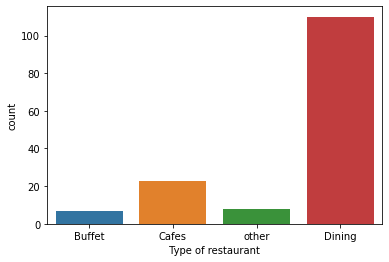

In [6]:
sns.countplot(x = df['listed_in(type)'],hue = df['listed_in(type)'])
plt.xlabel(" Type of restaurant ")
plt.show()

In [7]:
groupedData = df.groupby("listed_in(type)")["votes"].sum()
groupedData

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

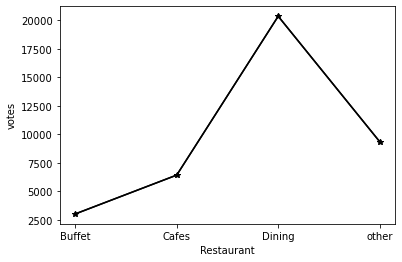

In [8]:
restrn_votes = pd.DataFrame({"votes": groupedData})
plt.plot(restrn_votes,c="black",marker="*")    # making a data frame from grouped data is a good thing
plt.plot(groupedData,c="black",marker="*")    #works both because grouped data is already in row and column format
plt.xlabel("Restaurant")
plt.ylabel("votes")
plt.show()

# For finding restaurant name with maximum votes 
**** #if there is a restaurant whose name is present more than one time in a data-set than we have to group all similar(name similarity) restaurant and then find the maximum voted restaurant

# using groupby and idxmax()

In [9]:
restaurantName = df.groupby("name")["votes"].sum().reset_index()
restaurantName

,name,votes
0,360 Atoms Restaurant And Cafe,13
1,Aarush's Food Plaza,0
2,Addhuri Udupi Bhojana,88
3,Amma - Manae,0
4,Anna Kuteera,771
...,...,...
140,Village Café,402
141,Wamama,354
142,Wood Stove,0
143,Woodee Pizza,180


In [10]:
max_votes_rest = restaurantName.loc[restaurantName['votes'].idxmax()]
max_votes_rest

name     Onesta
votes      5112
Name: 92, dtype: object

In [11]:
mx_votes_rest_func = restaurantName.nlargest(1,'votes')
mx_votes_rest_func

,name,votes
92,Onesta,5112


# For finding restaurant name with maximum votes 
*** #if all the restaurant are individual meaning there is no repeatation of restaurant name in a data-set then we can directly find them out via this way-----

# Using Classic approach

In [12]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [13]:
max_vote = df['votes'].max()
max_vote

4884

In [14]:
max_votes_restrant = df.loc[df['votes']==max_vote,'name']
max_votes_restrant

38    Empire Restaurant
Name: name, dtype: object

In [15]:
df.loc[38]

name                           Empire Restaurant
online_order                                 Yes
book_table                                    No
rate                                         4.4
votes                                       4884
approx_cost(for two people)                  750
listed_in(type)                            other
Name: 38, dtype: object

# Another way of finding max

In [16]:
# using nlargest method

In [17]:
maximum_votes_rest = df.nlargest(1,'votes')['name']
maximum_votes_rest

38    Empire Restaurant
Name: name, dtype: object

In [18]:
#The value 1 returns one row if we want we can get more than one largest votes in name column

In [19]:
maximum_votes_rest = df.nlargest(3,'votes')['name']
maximum_votes_rest #Provides top 3 row that has high votes

38    Empire Restaurant
86        Meghana Foods
7                Onesta
Name: name, dtype: object

# Using only idxmax() method

In [20]:
max_votes_index_restaurant = df['votes'].idxmax()
max_votes_index_restaurant

38

In [21]:
df.loc[38,'name']

'Empire Restaurant'

# Online acceptance

In [22]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


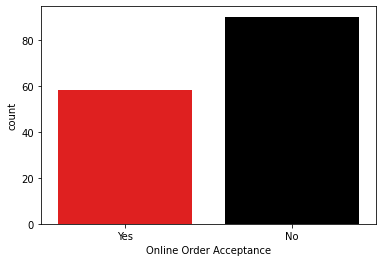

In [23]:
sns.countplot(x=df['online_order'],hue = df['online_order'],palette=['red','black'])
plt.xlabel("Online Order Acceptance")
plt.show()

# Rating Distribution

In [24]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


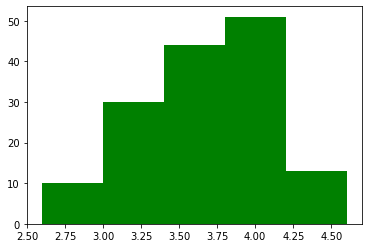

In [25]:
plt.hist(df['rate'],bins=5,color='green')
plt.show()

# Cost for two people in a Restaurant

In [26]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


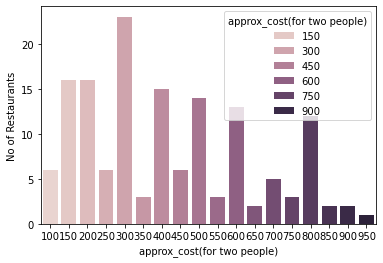

In [27]:
sns.countplot(x=df['approx_cost(for two people)'],hue=df['approx_cost(for two people)'])
plt.ylabel('No of Restaurants')
plt.show()

# Is Online order rating is higher than offline order rating

In [28]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


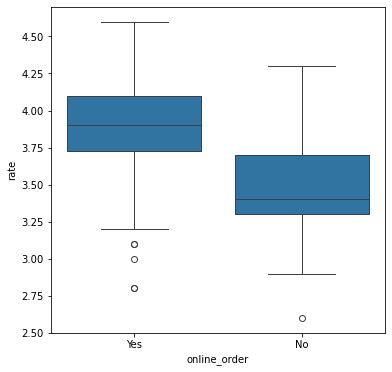

In [29]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df['online_order'],y=df['rate'])
plt.show()

In [30]:
df.shape

(148, 7)

In [31]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining
